# Decision Tree Classification

## Importing the libraries

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # is a Python library built on top of Matplotlib that provides a high-level interface for creating statistical graphics. Its main purpose is to simplify the creation of attractive and informative visualizations for data exploration, understanding, and communication.

## Importing the dataset

In [68]:
dataset = pd.read_csv('car_data.csv')
dataset.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [69]:
# Information about the dataset, including data types and null values
dataset.info()

# Shape of the dataset (number of rows and columns)
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


(1000, 5)

In [70]:
# Checking for duplicated rows in the dataset
dataset.duplicated().sum()

0

## Encoding the Independent Variable

In [71]:
# Encode object column using label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])

In [72]:
print(dataset)

     User ID  Gender  Age  AnnualSalary  Purchased
0        385       1   35         20000          0
1        681       1   40         43500          0
2        353       1   49         74000          0
3        895       1   40        107500          1
4        661       1   25         79000          0
..       ...     ...  ...           ...        ...
995      863       1   38         59000          0
996      800       0   47         23500          0
997      407       0   28        138500          1
998      299       0   48        134000          1
999      687       0   44         73500          0

[1000 rows x 5 columns]


In [73]:
# Descriptive statistics of the dataset with styled background gradient
dataset.describe().style.background_gradient(cmap = "Purples")

,User ID,Gender,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.484000,40.106000,72689.000000,0.402000
std,288.819436,0.499994,10.707073,34488.341867,0.490547
min,1.000000,0.000000,18.000000,15000.000000,0.000000
25%,250.750000,0.000000,32.000000,46375.000000,0.000000
50%,500.500000,0.000000,40.000000,72000.000000,0.000000
75%,750.250000,1.000000,48.000000,90000.000000,1.000000
max,1000.000000,1.000000,63.000000,152500.000000,1.000000


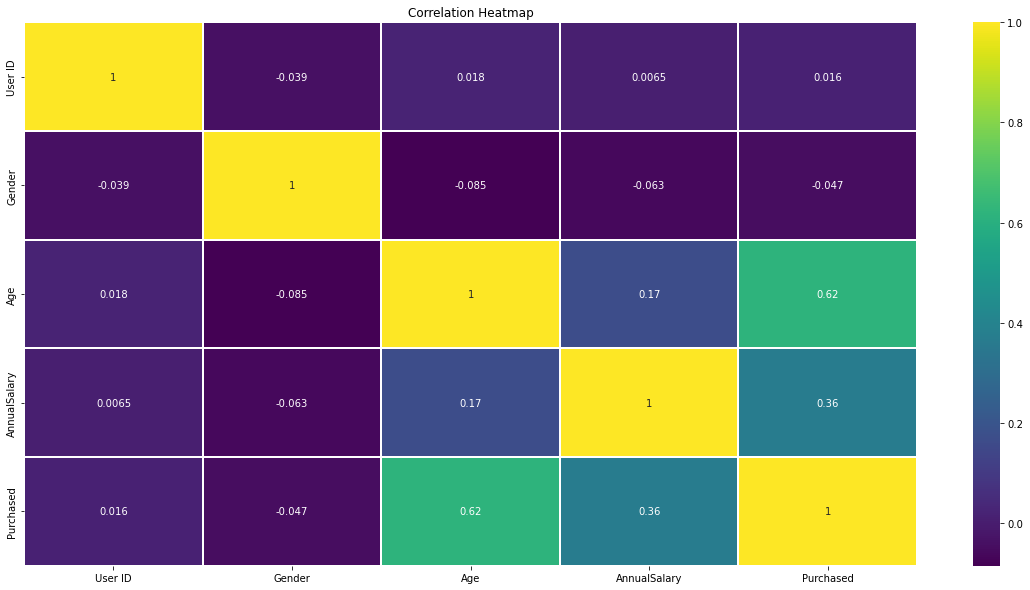

In [74]:
# Visualize the correlation between all features using a heatmap

plt.figure(figsize=(20,10)) # Make the figure will be 20 inches wide and 10 inches high.
sns.heatmap(dataset.corr(), cmap="viridis",annot=True,linewidths=0.1) # dataset.corr(): Calculates the correlation matrix of the dataset's numerical features. # cmap="viridis": Colormap used (here, viridis). # annot=True: Displays correlation values within each cell. # linewidths=0.1: Sets the width of the grid lines.
plt.title('Correlation Heatmap')
plt.show()

## Extracting features (X) and target variable (y) from the dataset

In [75]:
X = dataset.iloc[:, 2:-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (750, 2) (750,)
Test set: (250, 2) (250,)


In [77]:
print(X_train)

[[    20  20500]
 [    50  25500]
 [    51 136500]
 ...
 [    61  84500]
 [    30  62000]
 [    19  45500]]


In [78]:
print(y_train)

[0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0
 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1
 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1
 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0
 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1
 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0
 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0
 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0
 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 

In [79]:
print(X_test)

[[    54 136500]
 [    41  67500]
 [    50  29500]
 [    20  86000]
 [    27  31500]
 [    36  48500]
 [    40  97500]
 [    51  45500]
 [    55  71500]
 [    28  89500]
 [    47  80500]
 [    19  21000]
 [    35  44500]
 [    27  31000]
 [    46  33500]
 [    49  36000]
 [    33  60000]
 [    52  67500]
 [    42 108000]
 [    34  32500]
 [    32  67500]
 [    38  58500]
 [    27  82500]
 [    51  98500]
 [    55 140500]
 [    41  72500]
 [    37  75000]
 [    39  42000]
 [    38 145500]
 [    40  43500]
 [    40  80500]
 [    41  73500]
 [    29  86500]
 [    27  88000]
 [    25  80000]
 [    37  52000]
 [    26  80500]
 [    34  72000]
 [    38  71000]
 [    58 127500]
 [    36  76500]
 [    47  23500]
 [    54  35500]
 [    38  61000]
 [    51  37500]
 [    42  77500]
 [    30  15000]
 [    40  75000]
 [    31  18500]
 [    18  82000]
 [    57 134500]
 [    34  44500]
 [    42  65000]
 [    38  65000]
 [    41  53500]
 [    48  96000]
 [    34 150500]
 [    42  53000]
 [    31  7100

In [80]:
print(y_test)

[0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0
 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0
 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0
 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0
 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1]


## Feature Scaling

In [81]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [82]:
print(X_train)

[[-1.92084369 -1.50249061]
 [ 0.91133082 -1.35965201]
 [ 1.00573664  1.81136479]
 ...
 [ 1.94979481  0.3258434 ]
 [-0.97678552 -0.31693027]
 [-2.01524951 -0.78829764]]


In [83]:
print(X_test)

[[ 1.28895409  1.81136479]
 [ 0.06167847 -0.15980782]
 [ 0.91133082 -1.24538114]
 [-1.92084369  0.36869498]
 [-1.26000297 -1.1882457 ]
 [-0.41035062 -0.70259448]
 [-0.03272735  0.69722375]
 [ 1.00573664 -0.78829764]
 [ 1.3833599  -0.04553694]
 [-1.16559715  0.468682  ]
 [ 0.62811337  0.21157253]
 [-2.01524951 -1.48820675]
 [-0.50475643 -0.81686535]
 [-1.26000297 -1.20252956]
 [ 0.53370755 -1.13111026]
 [ 0.816925   -1.05969097]
 [-0.69356807 -0.37406571]
 [ 1.10014245 -0.15980782]
 [ 0.15608428  0.9971848 ]
 [-0.59916225 -1.15967798]
 [-0.78797389 -0.15980782]
 [-0.22153898 -0.41691729]
 [-1.26000297  0.26870796]
 [ 1.00573664  0.72579147]
 [ 1.3833599   1.92563566]
 [ 0.06167847 -0.01696923]
 [-0.3159448   0.05445007]
 [-0.12713317 -0.88828465]
 [-0.22153898  2.06847426]
 [-0.03272735 -0.84543307]
 [-0.03272735  0.21157253]
 [ 0.06167847  0.01159849]
 [-1.07119134  0.38297884]
 [-1.26000297  0.42583042]
 [-1.4488146   0.19728867]
 [-0.3159448  -0.60260746]
 [-1.35440879  0.21157253]
 

## Training the Decision Tree Classification model on the Training set

In [84]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting a new result

In [85]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predicting the Test set results

In [86]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]

## Making the Confusion Matrix

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[138  14]
 [ 16  82]]


0.88

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


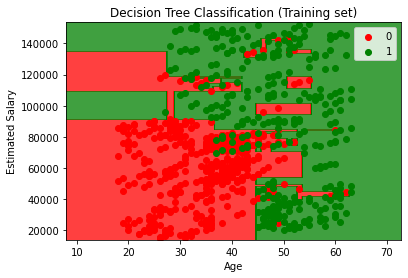

In [88]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


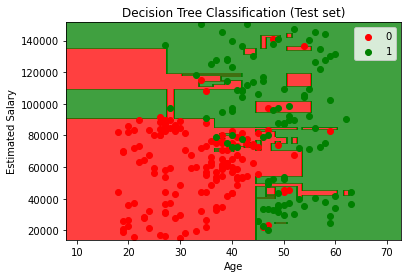

In [89]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()